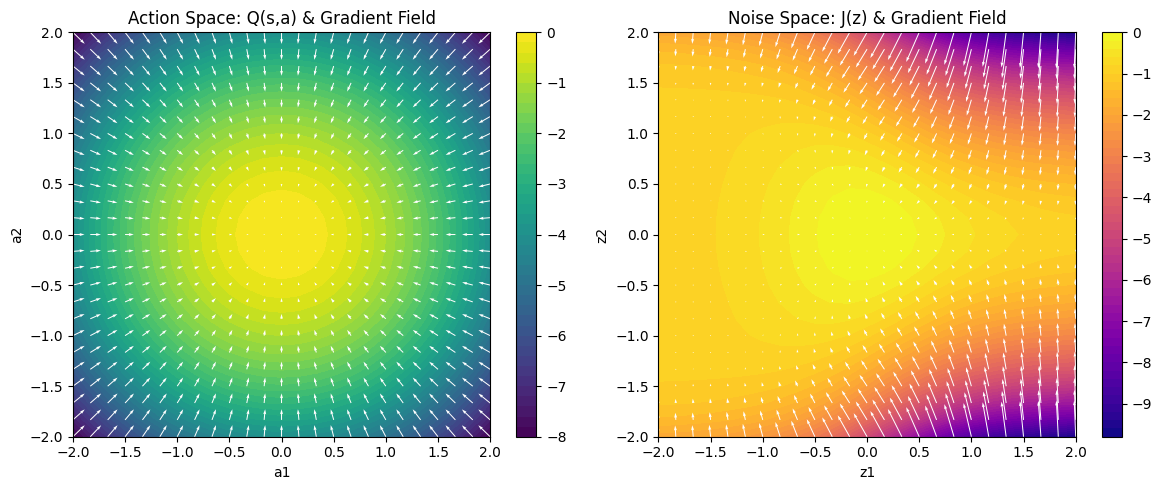

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Q(s,a) = -(a1^2 + a2^2)，简单 bowl
def Q(a1, a2):
    return -(a1**2 + a2**2)

# 定义非线性映射 a = f(z)
def f(z1, z2):
    a1 = np.tanh(z1) + 0.5 * z2**2
    a2 = np.sin(z2)
    return a1, a2

# Action space梯度 ∇Q/∇a
def grad_Q(a1, a2):
    dQ_da1 = -2 * a1
    dQ_da2 = -2 * a2
    return dQ_da1, dQ_da2

# Noise space梯度 ∇J/∇z
def grad_J(z1, z2):
    # forward
    a1, a2 = f(z1, z2)
    dQ_da1, dQ_da2 = grad_Q(a1, a2)

    # Jacobian ∂a/∂z
    da1_dz1 = 1 - np.tanh(z1)**2   # derivative of tanh
    da1_dz2 = z2                   # derivative of 0.5*z2^2
    da2_dz1 = 0
    da2_dz2 = np.cos(z2)

    # chain rule
    dJ_dz1 = dQ_da1 * da1_dz1 + dQ_da2 * da2_dz1
    dJ_dz2 = dQ_da1 * da1_dz2 + dQ_da2 * da2_dz2
    return dJ_dz1, dJ_dz2

# 网格
grid = np.linspace(-2, 2, 25)  # quiver用稀疏网格
Z1, Z2 = np.meshgrid(grid, grid)

# Action space: Q landscape + grad
A1, A2 = Z1, Z2
Q_vals = Q(A1, A2)
dQ1, dQ2 = grad_Q(A1, A2)

# Noise space: J landscape + grad
F1, F2 = f(Z1, Z2)
J_vals = Q(F1, F2)
dJ1, dJ2 = grad_J(Z1, Z2)

# ---- Plot ----
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Action space
c1 = axs[0].contourf(A1, A2, Q_vals, levels=50, cmap="viridis")
axs[0].quiver(A1, A2, dQ1, dQ2, color="white", angles="xy")
axs[0].set_title("Action Space: Q(s,a) & Gradient Field")
axs[0].set_xlabel("a1")
axs[0].set_ylabel("a2")
fig.colorbar(c1, ax=axs[0])

# Noise space
c2 = axs[1].contourf(Z1, Z2, J_vals, levels=50, cmap="plasma")
axs[1].quiver(Z1, Z2, dJ1, dJ2, color="white", angles="xy")
axs[1].set_title("Noise Space: J(z) & Gradient Field")
axs[1].set_xlabel("z1")
axs[1].set_ylabel("z2")
fig.colorbar(c2, ax=axs[1])

plt.tight_layout()
plt.show()
